





**Transaction Monitoring**

> Building a model based on a dataset of transactions on wheather the transaction is a case of Money Laundaring.
>This is the Final Code that will be running through out the system 

## **Explaratory Data Analysis**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

In [ ]:
#DISPLAYING OUT DATASET
df = pd.read_csv('/Book1.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
50421,9,PAYMENT,11141.77,C1387840921,288064.39,276922.63,M191065722,0.00,0.00,0,0
50422,9,CASH_OUT,346321.39,C1694240929,276922.63,0.00,C1948471365,5516663.89,6847755.96,0,0
50423,9,CASH_OUT,334943.53,C1628781423,124.00,0.00,C1284792861,0.00,751505.60,0,0
50424,9,PAYMENT,42299.14,C1964355289,2375843.75,2333544.61,M1704271551,0.00,0.00,0,0


In [ ]:
#CHECKING THE CONTENTS OF THE DATASET 
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50426.000000,5.042600e+04,5.042600e+04,5.042600e+04,5.042600e+04,5.042600e+04,50426.000000,50426.0
mean,7.466862,1.566697e+05,7.302547e+05,7.442820e+05,8.434186e+05,1.164465e+06,0.001983,0.0
std,2.052813,3.257933e+05,2.194431e+06,2.231945e+06,2.430116e+06,2.912477e+06,0.044488,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.780685e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.377712e+04,1.715084e+04,0.000000e+00,2.556870e+03,0.000000e+00,0.000000,0.0
75%,9.000000,1.881848e+05,1.340655e+05,1.450010e+05,4.631355e+05,8.674971e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.850000e+07,2.860000e+07,3.010000e+07,3.200000e+07,1.000000,0.0


THE TYPE OF TRANSACTIONS THAT WOULD BE MADE ARE MENTIONED BELOW

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
#SHUFFING /CLEANING THE DATASET
df = df.drop(['isFlaggedFraud','step','nameOrig','nameDest'], axis =1 )
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

## **Relationship Analysis**

In [ ]:
correlation = df.corr()

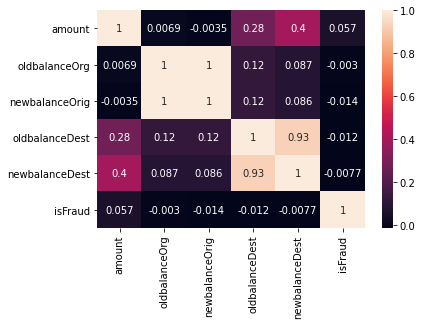

In [ ]:
sns.heatmap(correlation, xticklabels = correlation.columns,
                    yticklabels = correlation.columns,
            annot = True )

In [ ]:
#NOT IMPORTANT FOR DISPLAYING 
#sns.pairplot(df)

In [ ]:
#CONVERTING THE TYPE PARAMETER INTO THE LABEL ENCODING 
from sklearn.preprocessing import OneHotEncoder 
df=pd.get_dummies(df)

In [ ]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
10845,6086.05,0.00,0.00,0.00,0.00,0,0,0,0,1,0
3025,11378.85,207181.00,195802.15,0.00,0.00,0,0,0,0,1,0
9432,504.83,608907.09,608402.27,0.00,0.00,0,0,0,0,1,0
41649,31404.30,0.00,0.00,0.00,0.00,0,0,0,0,1,0
42972,64817.29,10987753.09,11052570.38,564787.87,769109.49,0,1,0,0,0,0


In [ ]:
y = df.loc[:,'isFraud']
X = df.drop(['isFraud'],axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=1231)

In [ ]:
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
47428,29869.89,20353.00,0.0,0.00,0.00,0,0,0,1,0
15828,151250.84,3840.56,0.0,823545.60,951130.52,0,1,0,0,0
18875,387812.47,0.00,0.0,2989805.85,4605990.97,0,1,0,0,0
42011,6618.25,0.00,0.0,0.00,0.00,0,0,0,1,0
47069,6270.41,3851.00,0.0,0.00,0.00,0,0,0,1,0


In [ ]:
y_train.head()

47428    0
15828    0
18875    0
42011    0
47069    0
Name: isFraud, dtype: int64

**Training The Model**

BELOW IS THE CODE FOR TRAINING THE MODEL - ABOVE ALL THE CODE USED FOR CLEANING AND SPLITTING THE DATA FOR THE PROCESSING 

In [ ]:
def generate_accuracy(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,12589,0
1,13,5


In [ ]:
generate_accuracy(classifier, X_test, y_test)

Accuracy is:  0.9990481478543666
F1 score is:  0.6842105263157894


THE ABOVE PART IS TRAINING THE MODEL BASED ON THE DATASET THAT WAS PROVIDED TO US 

NOW THE PREDICTIONS MADE ARE SEND TO ANOTHER SYSTEM

# Using y_pred - Which Was Made By Fitting The Model Is Now Used
By Kushagra Bajpai


In [ ]:
#TYPE OF DATA PRESENT IN Y_PREDICTIONS
y_predictions=y_pred
y_predictions.size

12607

In [ ]:
type(y_test)
y_test.size

12607

## Downloading the predicted data as csv file

In [ ]:
np.savetxt("predictionsTrans.csv", y_pred, delimiter=',')